# Plot Query Mappings to Reference Sequence

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysam

In [34]:
def supp_query_list(sam_file):
    '''
    Extract list of queries with supplementary mappings from SAM file.
    '''
    supplementary = []
    with pysam.AlignmentFile(sam_file) as af:
        for read in af:
            if read.is_supplementary:
                supplementary.append(read.query_name)
    return np.unique(supplementary)

In [35]:
def select_queries_in_range(query_list, df, lower, upper):
    '''
    Extract list of queries whose primary mapping starts in a defined range of the reference.
    '''
    p = df[(df["type"] == "primary")]
    p_in_range = p[(p["ref_start"] > lower) & (p["ref_start"] < upper)]
    return p_in_range["query_name"]

In [36]:
def plot_query_to_ref(df, query_name):
    '''
    Plot each mapping of a query to its position on the reference.
    '''
    query_df = df[df["query_name"] == query_name]
    query_shift = np.min(query_df["ref_start"])
    for row in query_df.itertuples():
        color = np.random.rand(1,3) # random color
        style = "-" if row.is_forward else ":"
        plt.plot([row.query_start + query_shift, row.ref_start],[1,0],c=color,ls=style)
        plt.plot([row.query_end + query_shift, row.ref_end],[1,0],c=color,ls=style)
    plt.plot([query_shift,query_shift + query_df["query_length"].iloc[0]],[1,1],c="k",lw=5)
    #plt.plot([0, 4643630],[0,0],c="k",lw=5)
    #plt.axvline(3.983e6)
    plt.title(query_name)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Reference position")
    plt.savefig("../results/figures/plt_query_to_ref_{0}.png".format(query_name))
    plt.show()

In [37]:
csv_file = "../results/suppl_reads_info.csv"
sam_file = "../results/reads.sorted.bam"
lower_ref = 2.6e6 #3.95e6 
upper_ref = 2.8e6 #4.05e6 

# Plot queries in defined range
csv_input = pd.read_csv(csv_file)
df = csv_input #[((csv_input["type"] == "primary") | (csv_input["type"] == "supplementary"))] # to exclude secondary
df.sort_values(by="alignment_length",ascending=False)
supplementary = supp_query_list(sam_file)
queries_in_range = select_queries_in_range(supplementary, df, lower_ref, upper_ref)
queries_in_range.to_csv("../results/queries_in_range_{0}.csv".format(lower_ref))

#for s in queries_in_range:
#    plot_query_to_ref(df, s)

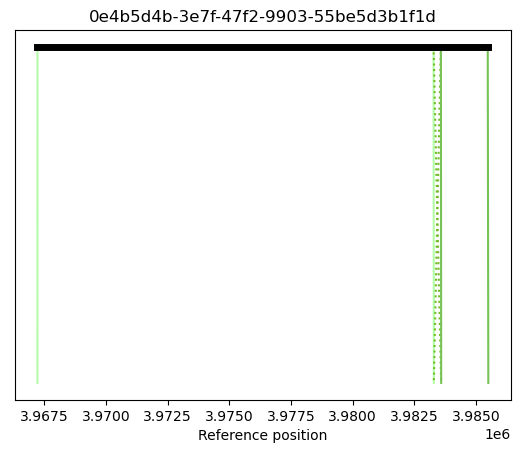

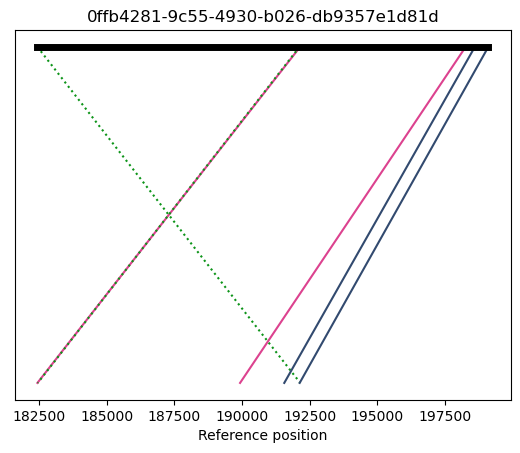

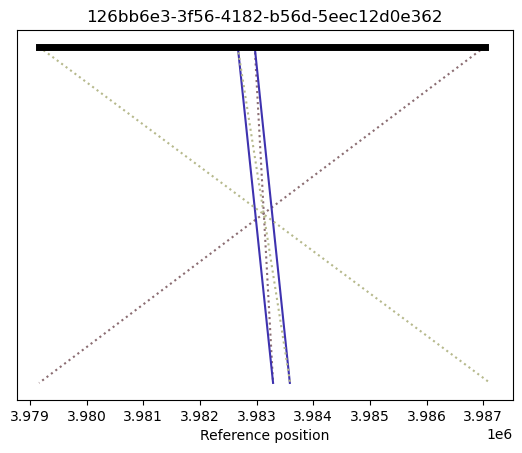

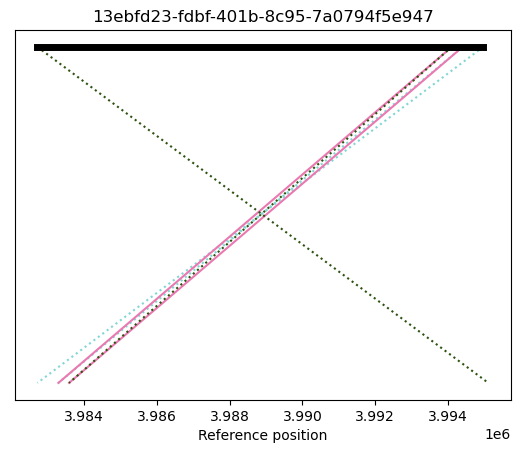

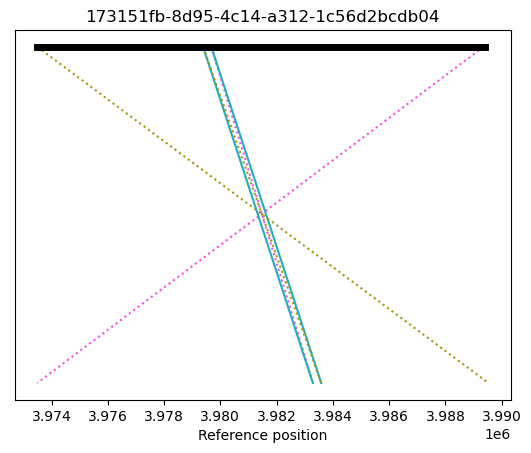

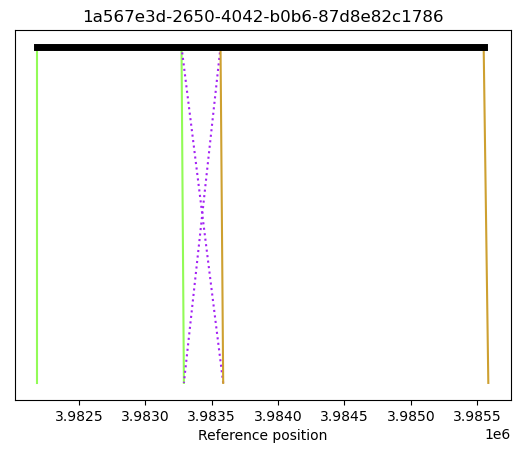

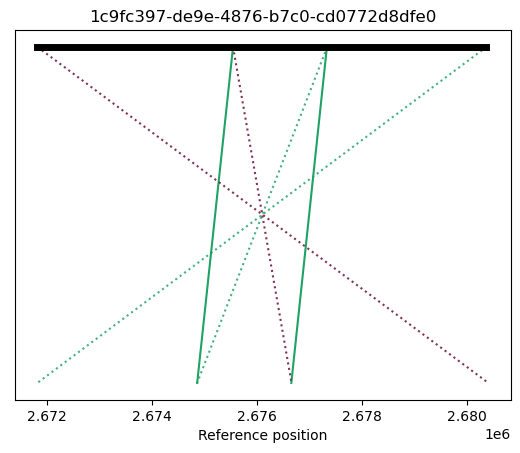

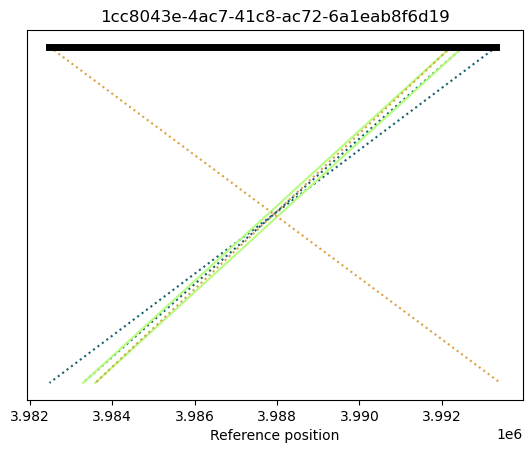

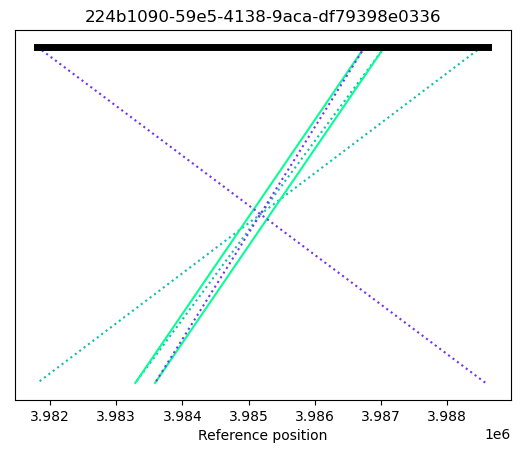

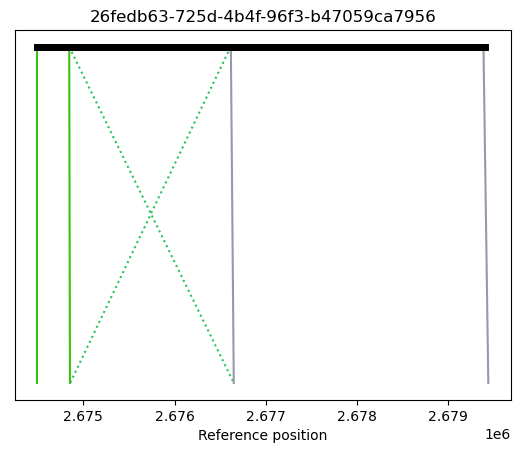

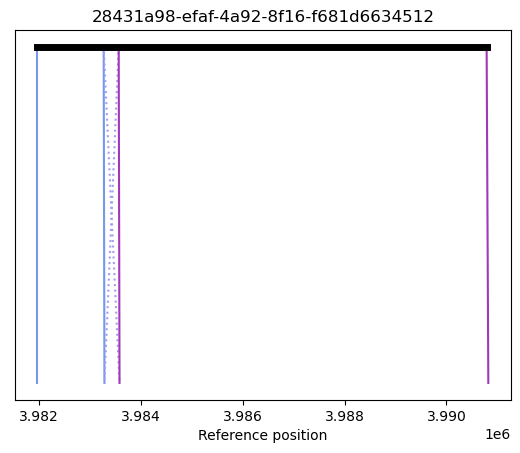

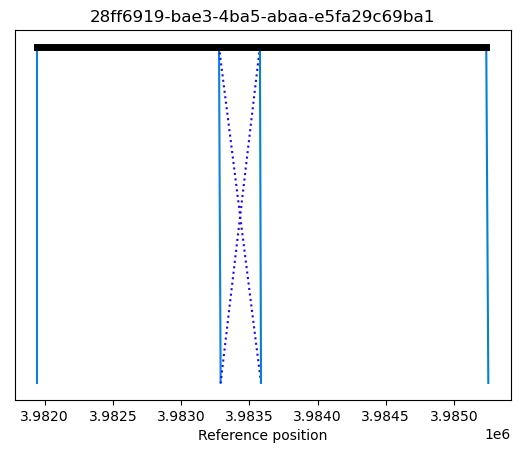

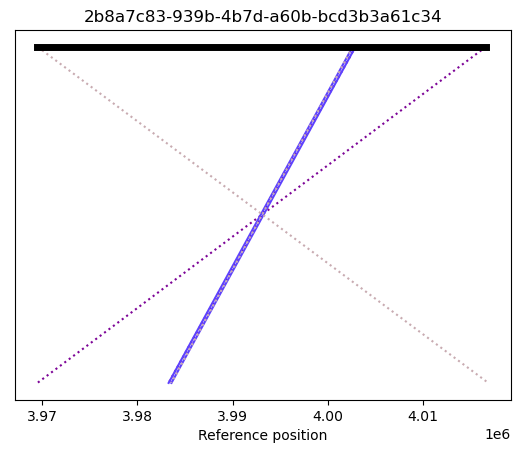

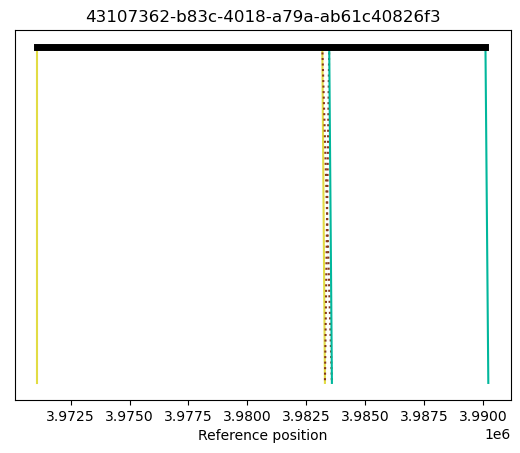

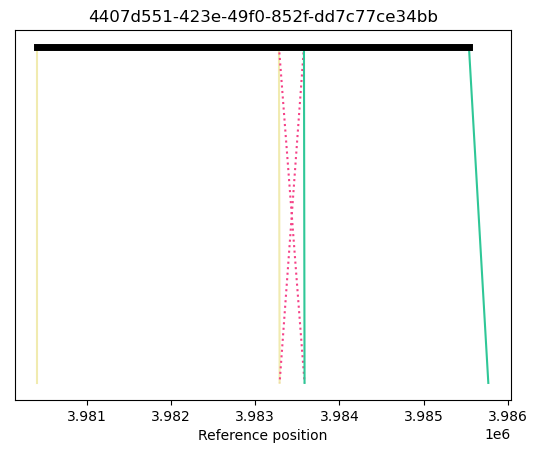

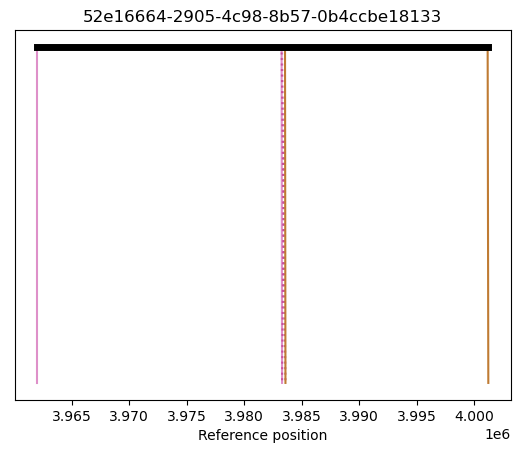

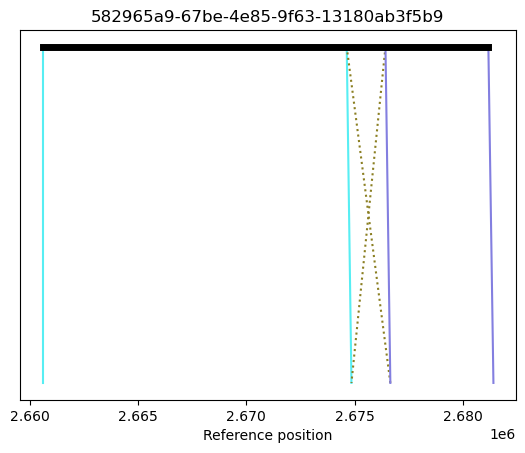

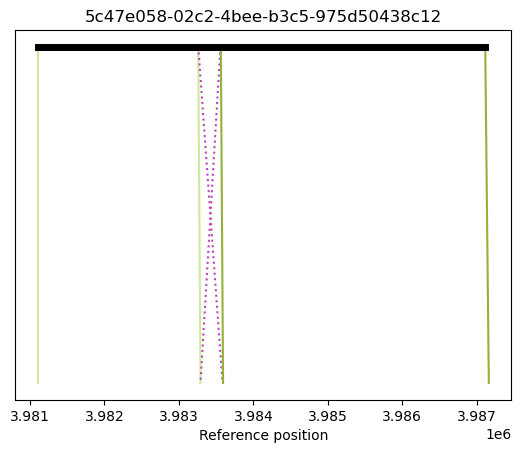

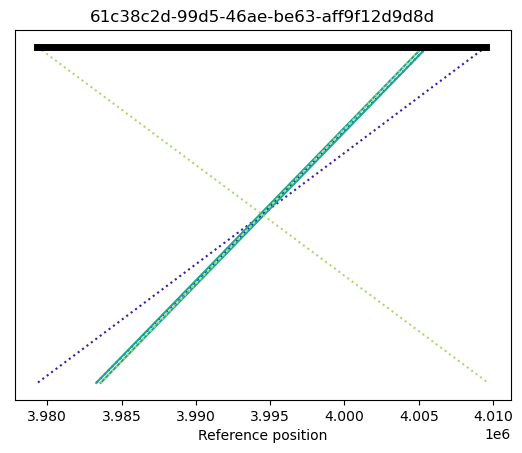

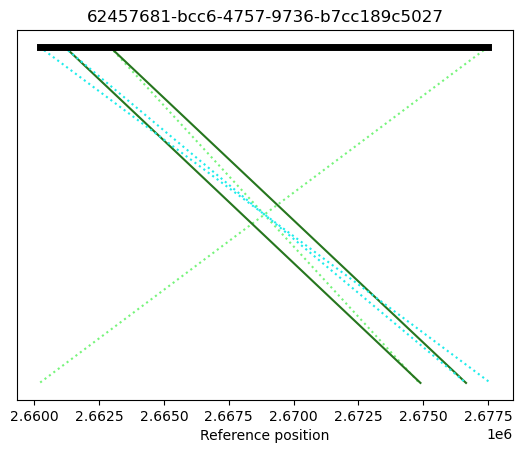

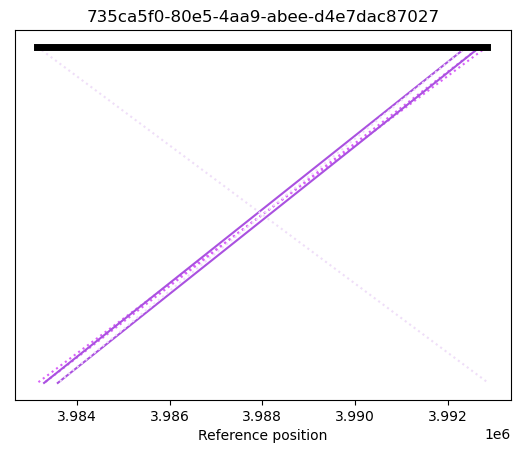

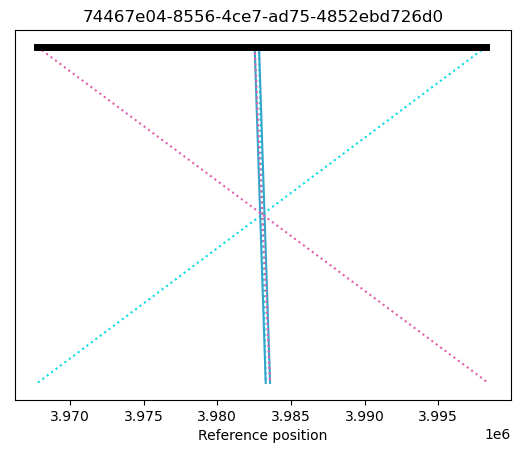

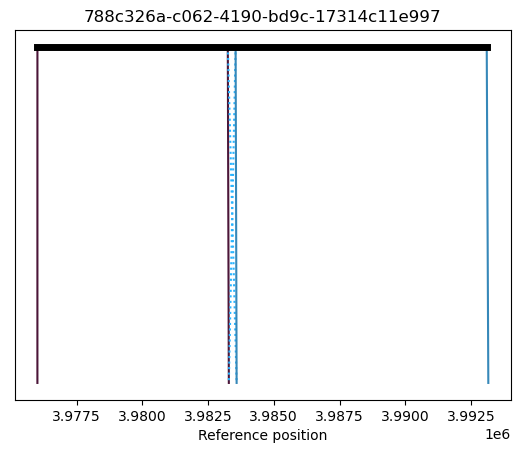

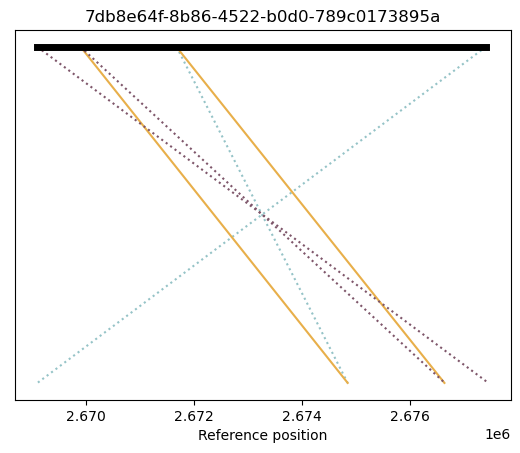

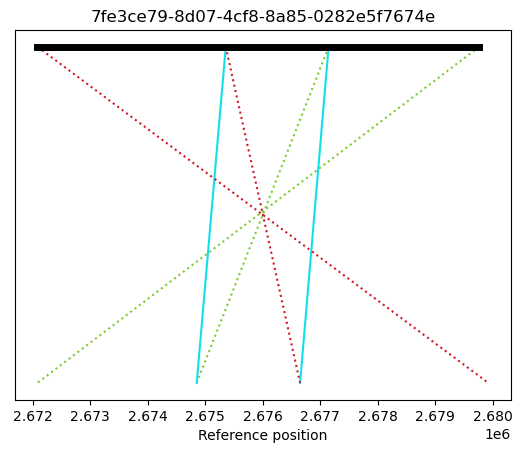

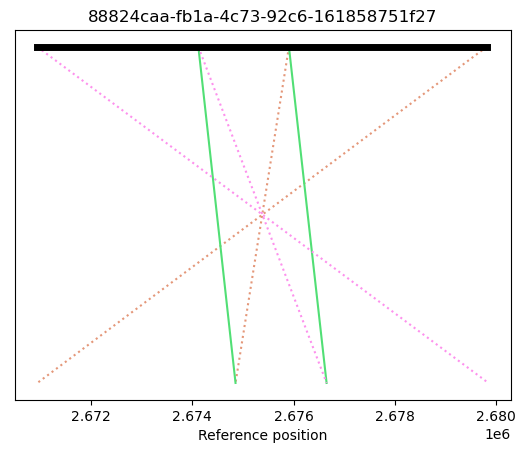

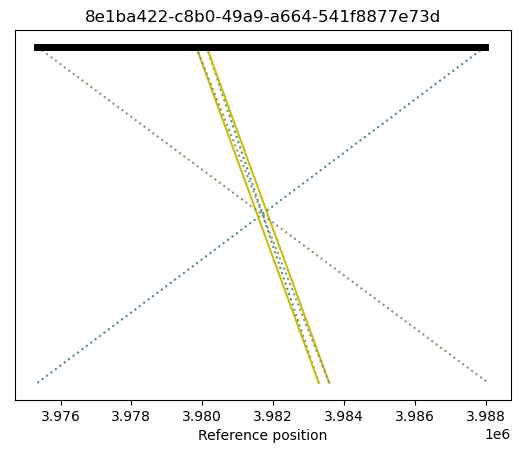

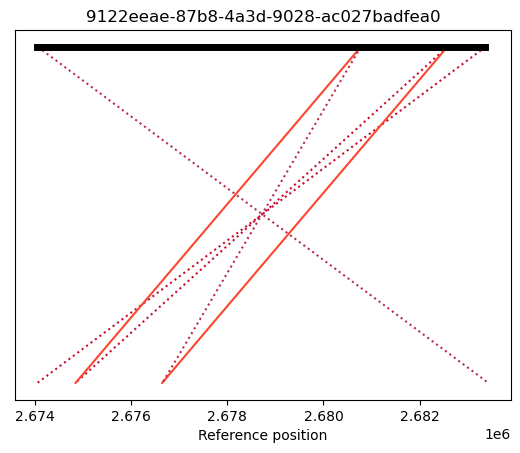

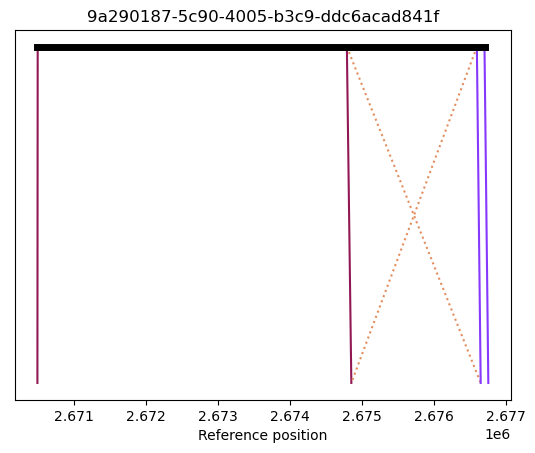

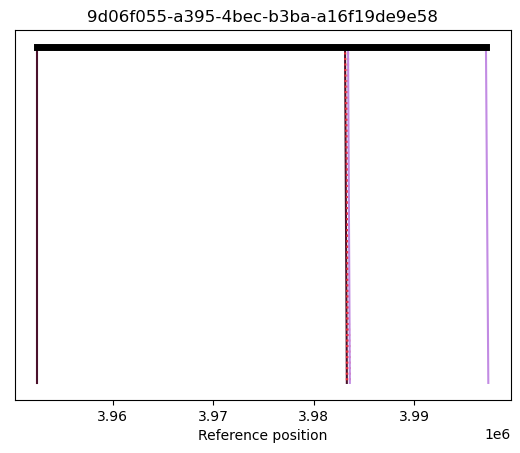

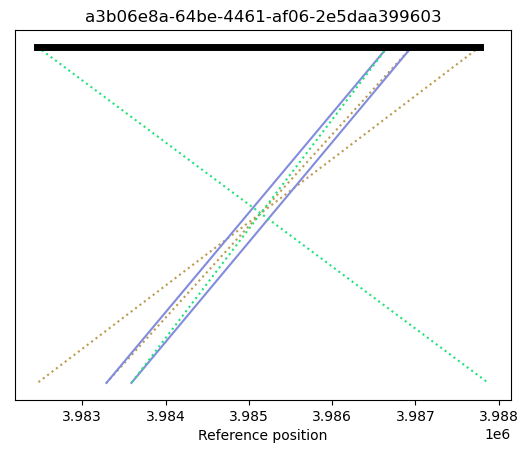

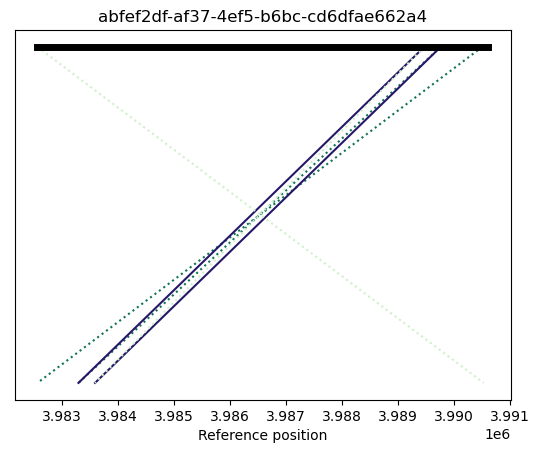

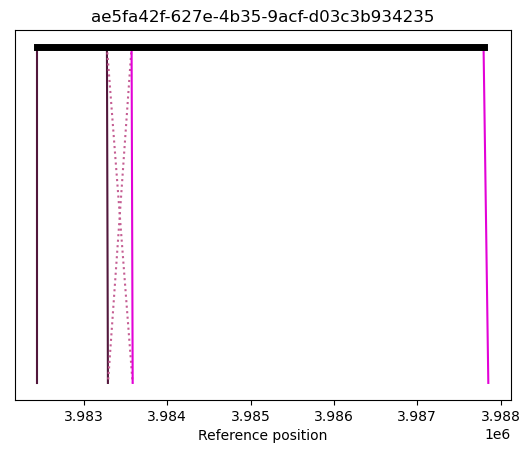

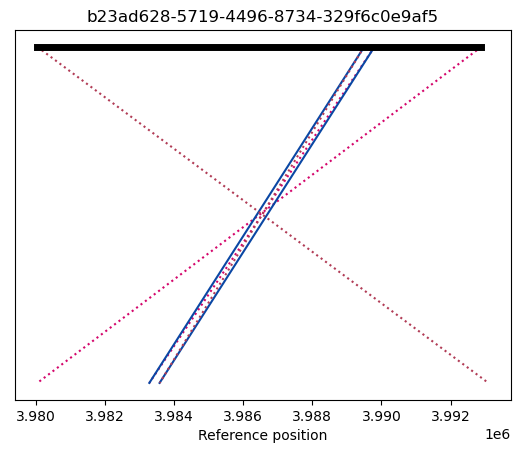

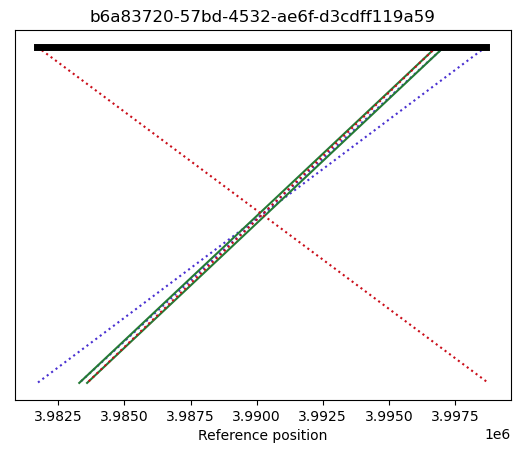

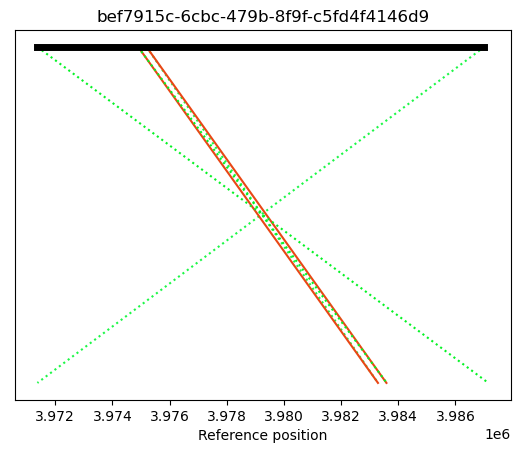

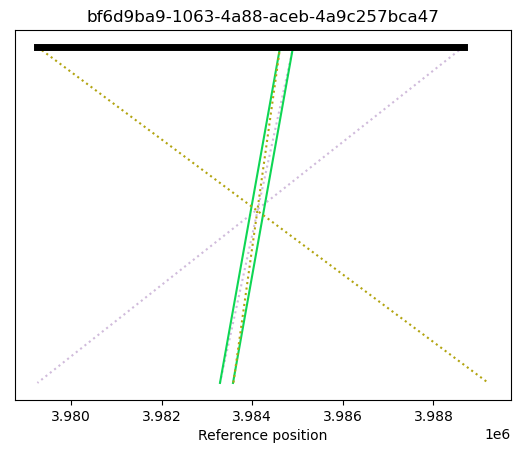

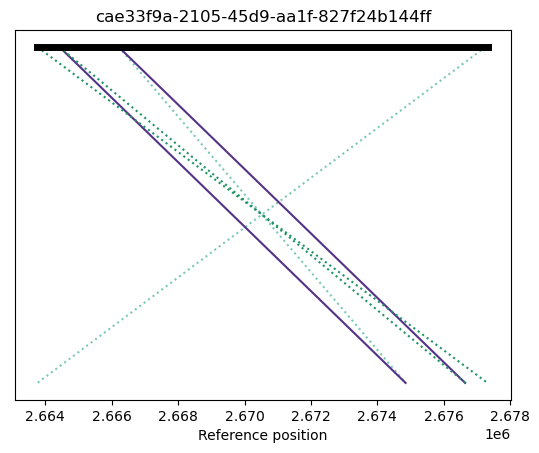

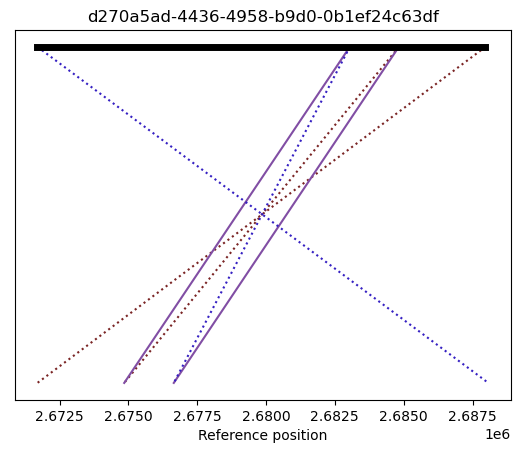

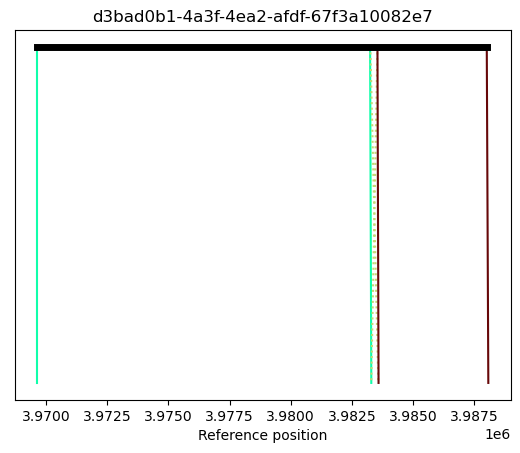

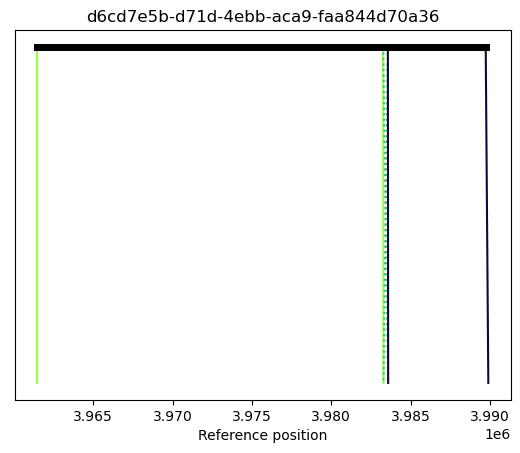

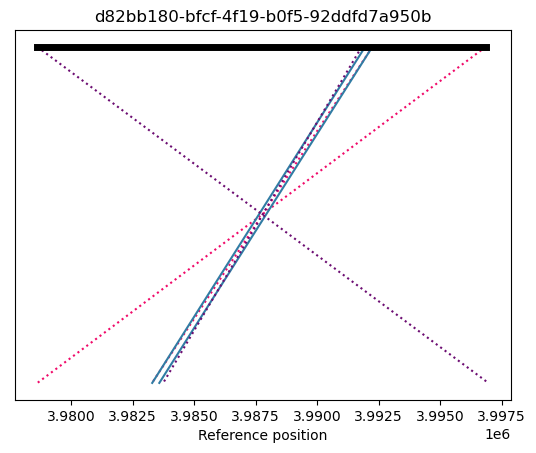

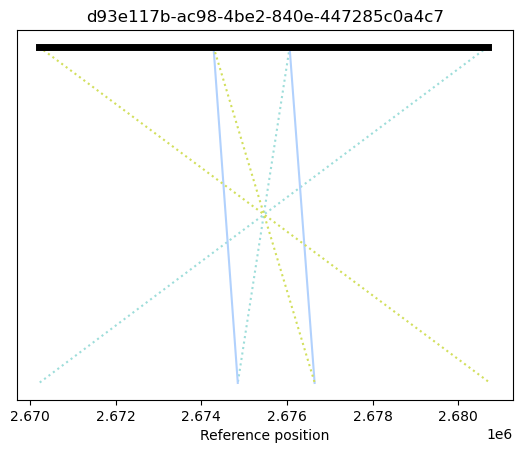

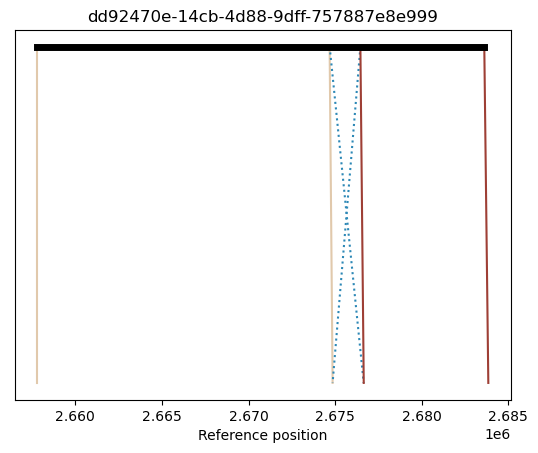

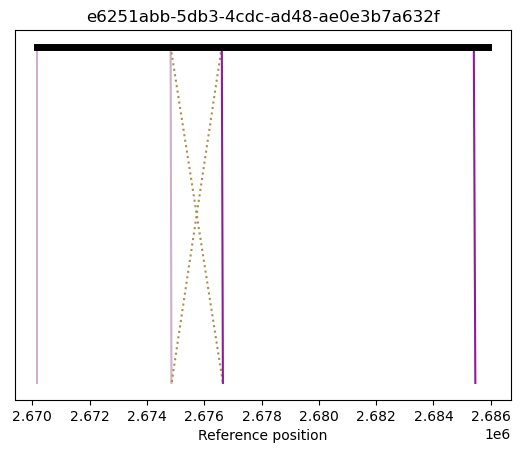

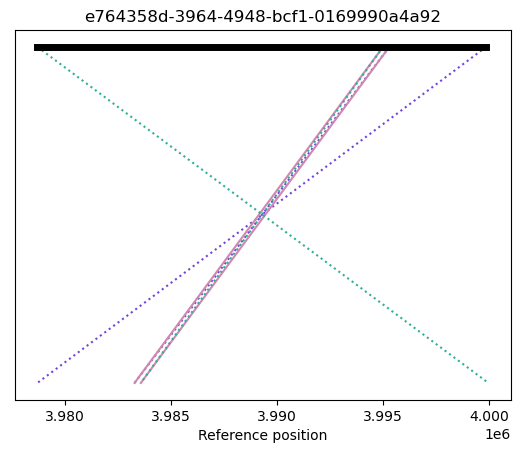

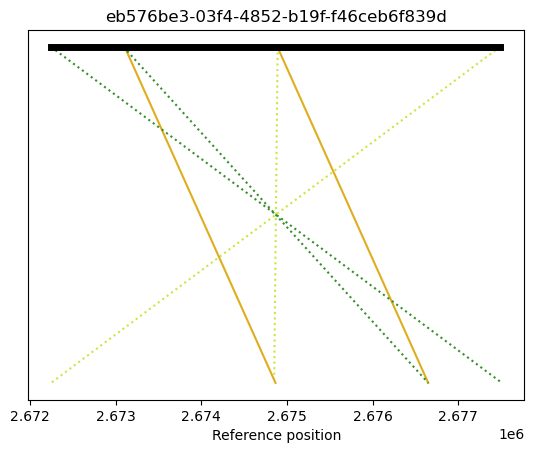

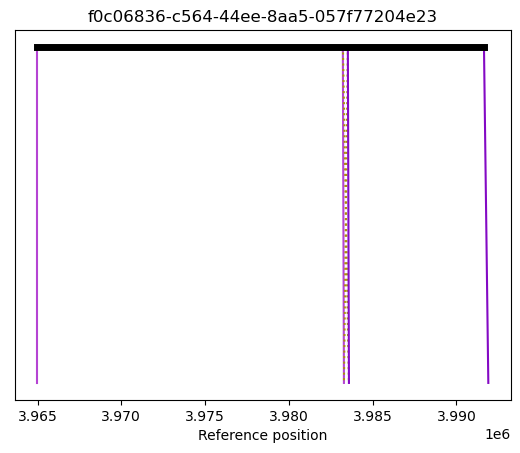

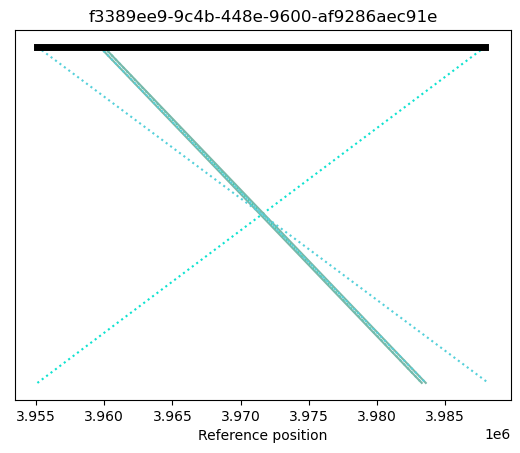

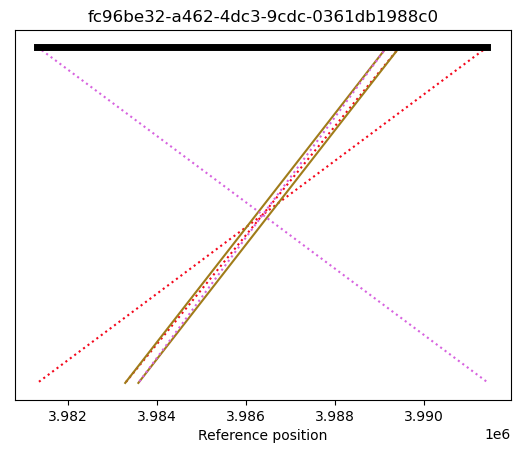

In [38]:
# Plot queries with distant mappings
queries_distant = pd.read_csv("../results/distant_mappings.csv")
queries_distant = queries_distant["query_name"]
# for s in queries_distant:
#     plot_query_to_ref(df, s)

# Plot diagonal (close) mappings
diag = []
for q in df.itertuples():
    if q.query_name not in queries_distant: # only reads that don't have distant mapping (but may have close)
        diag.append(q.query_name)
diag = np.unique(diag)
diag_one_prim_one_supp = ['0009d992-238c-41a6-a605-38142f57f905', '007490db-1831-4d4b-9186-941351e0a478', '043c0bbc-6155-480c-9aa9-1dbb5e473788', '04a96376-4f71-4a38-8eb7-b21294b586b8', '0afb4bc0-ba36-4008-bab5-69d6755b3bdc', '0b172a66-2bb4-4922-9ce1-8ef430d31d40', '1163c3da-d7f3-4306-a17a-0d6e5862a681', '11927703-8930-4b5d-9c49-60b3c95dfd82', '12478c56-4b77-4cf9-996f-21ffb382ce29', '139d05fb-66cc-4225-bfdf-5d196943e728', '13d2bd66-44d8-4580-b1e7-c01747777895', '1636a557-6115-4caa-bab5-214dbd1bb912', '1755fa7b-6836-482d-95b8-6d50eecc9dac', '178d61ef-a5c2-4719-adaa-dad4508bbc2a', '184147b9-2700-4266-97b7-4fda94da3e82', '18d57ed0-47bc-45e9-8e0f-9a5046d0ece7', '196bb9ca-07b2-47ed-b02b-b426fc9723d4', '1c0549f6-30c5-426e-a905-fbbab9c5a8c8', '1c3d92a5-8e86-45b7-b89e-90010397a4bb', '1cd54b10-0abf-4fdf-b497-5e90f8a5b52f', '1d37b72d-36c7-4596-85bc-dd66427230de', '1eeceafe-723c-4b2b-bc30-da1b5a7cbddf', '20366f9f-4d94-4356-857d-2eb06686ac87', '232f1c62-a3aa-4c6a-b7a7-2724efd91b78', '2358891c-a7d6-41ef-9cd9-61adb435073c', '259794a9-3ccc-482a-96ea-12edaa80c4ae', '2739e78e-cf60-4a0c-bf4c-966f767be842', '2aca9699-04c0-4122-b8a8-fcb3ae83c4e9', '2ba1407c-e0df-4365-add4-b62e8fdfb5fe', '2d52fd14-5e99-4d20-9fdf-d26620ea8dd0', '31e82a5f-c5d0-44e2-829d-a5e585d42057', '32d248c6-1e48-4042-a60e-e4528c42349a', '339128b9-fa66-4051-a2b7-094163b41f6d', '3486983f-71a7-41a5-ba01-b7701abf3588', '3488944f-083b-43b9-bc0a-42732e7b1fa2', '379ed43a-59dc-432f-926a-65a1d475144c', '3aae5002-0e59-4c7c-88d6-e9f9b7397dba', '3ab83f79-53ca-45d0-a9b6-c1c6b69a7794', '3cb85beb-89a5-432e-9ff5-86054cc86362', '3edff7a1-23cf-479b-abdb-c1aeb5ef694f', '44e85c15-aa27-494e-b8a8-5e9d0894c083', '467d4539-c24a-4957-bd07-f2a841ee1119', '5517e323-9e5c-4ddb-8784-a0259974f603', '55286df3-cc00-4ec0-bbb1-4719d486f4c0', '578a1ba5-f00f-438d-a77f-7c5cdfcb70a0', '5a25a987-970d-4f08-a1ff-8b29bd0b571a', '61939dbf-10ac-4aa6-a093-360492129f6f', '67cbc2d4-0076-44f8-b528-39d55c7bcb59', '67d4dc15-e27c-45a7-a6e8-bc04e2341d65', '68c89269-3a99-4fe1-9e7a-83961d31810c', '6b1c503f-1172-496a-9078-ebc3b6b3c17d', '6c474cb4-c7b7-4e25-a2d6-7fe629352bd0', '7487ee1c-040d-4f3b-8d62-cf73ea9c6179', '75d195f6-74fc-4276-88c5-de68be8fb267', '76e96319-1c78-47e8-87b8-5be8368c6bb2', '76f14ea2-ae9f-48d7-abf5-77eea2c5802f', '7dc0f285-0d6c-4313-b091-13c0a80b2e2f', '839d9804-fed8-45f8-8658-262bbda81895', '86523b16-d5db-4e6c-9b61-ee36f2fc4a65', '86d28957-7d94-4aee-94c2-7e7576b5e051', '8851af0a-1277-4bcd-ab13-cfd590443e36', '903f661e-3b9e-4d9e-9d03-a6f8556c8748', '9119437e-b0b0-4250-8674-945c95d9e08b', '918e47be-10c7-4235-b45a-1332db634a5a', '94f69835-380c-4c98-a310-3541eae25f09', '9506bd65-17de-412c-a36e-276971bee5b2', '9637aa27-30cd-4905-bfb7-5edd0a2b1e4a', '98ef5c3a-4ca2-4163-a4f7-4fae90078466', '99532dd6-ed76-42b6-a113-e1d3b599631f', '9e3cfbf7-a864-4330-a886-3410f03ecb65', '9e4240bd-88c8-429f-b259-294927371697', '9ea13e6a-e33a-4117-8ea4-00561c603730', '9fc03085-cf1f-4bbd-966a-f45b0fac6662', 'a1cfde1d-30df-407b-8454-34c789ecb001', 'a276c7d7-2703-48a0-a12c-81d8d12f00d9', 'a4da077a-33cf-4390-a8bd-8bf11daada5c', 'a62c74d2-909f-4470-ac58-8a38c6dffb21', 'a82944ff-ff43-4daf-8d0e-ca8c659627d1', 'ab51215d-c285-4b95-ac76-2b76f6681517', 'b08db78d-bda8-4dad-8d66-fc12d193b616', 'b1f87367-6fc9-4695-a085-6c9772e78303', 'b2393fd1-9464-4055-a427-f35cb661f685', 'b2e4ac52-d040-492a-944e-4e81b52a9040', 'b330e5d0-255a-48dd-ac41-4b5d7b2d45bd', 'b3aec7c0-ab53-4965-be3f-f3d5a59a8246', 'b9e8a54a-0c58-4a00-8416-17144f277cdc', 'bcdb4200-1557-4fbc-8925-7007f3c8ca15', 'c0e2b6d7-fbb1-48ad-a09f-7782656a9799', 'c0e7bf69-1f18-40c3-bc9d-8f4f356dd327', 'c1368b5a-f7e9-447c-b52e-f99b7a60407b', 'c240712b-b0f1-431c-8684-ac3452dbc611', 'c3124156-682d-4190-870d-c9c3b51d84d5', 'cd5abdbc-ec32-4aa8-bca7-d9c40cecce78', 'cf6c555b-c7f8-484b-ab74-432d009b9d75', 'd185e0f0-1ae6-4e7d-a9d5-22a62e972762', 'd234f041-4760-4516-888e-2a5871bedefd', 'd50a1f53-61ed-4bad-a091-1be7008be9b9', 'd66adeef-205c-4475-8a96-5ef66108f396', 'd68669c8-2ba9-4fae-9f62-a7b2a4a5451c', 'd768d007-c858-45a8-8ed8-d51efc2c8428', 'd8515080-85aa-47f7-bd5d-34f0521195d1', 'da3a07b1-433f-4648-b139-8d1b36fa401e', 'dcac53ea-b41a-476e-81a9-6abf76aff01c', 'ddc3dc62-da1f-425c-a666-ee52e9d58499', 'e0792692-50fb-4b9a-ac60-bb6b02385526', 'e098373d-68ba-430a-9d8f-7d8e60f3ffd2', 'e2492100-0427-41af-b258-d23c01559a46', 'e55995ba-45ff-48cb-9342-b942da10cd1b', 'e680900a-e758-4af3-a372-d5b6ca06e38c', 'e6ef62f6-712f-422e-bc1e-937935288971', 'e869e5f2-8fcf-4f53-8cd5-c5afc774d125', 'e86f8a8f-510f-405b-839b-67a328ee3073', 'e8bbbb2f-2f12-4212-9951-211f24adaddf', 'f0427475-08dc-41b4-ada4-e98521275cf2', 'f17c6ed8-4dad-4800-85cb-887c09edaa9e', 'f2678cb3-bbe2-4c46-9bd2-81399f6f50dd', 'f92dd9ff-6960-44cc-9253-a0ea70e60319', 'fb049743-4297-46e0-a14f-78233de727e8', 'fcc65a75-068b-4246-8117-23545e299812', 'fd1d4edc-6800-4ab9-b96c-4142c684d8f3', 'fee128f8-de52-4e23-be1b-70112ad38718']
diag_neg_dist = ['0009d992-238c-41a6-a605-38142f57f905', '043c0bbc-6155-480c-9aa9-1dbb5e473788', '0b172a66-2bb4-4922-9ce1-8ef430d31d40', '1163c3da-d7f3-4306-a17a-0d6e5862a681', '12478c56-4b77-4cf9-996f-21ffb382ce29', '1636a557-6115-4caa-bab5-214dbd1bb912', '1755fa7b-6836-482d-95b8-6d50eecc9dac', '1c3d92a5-8e86-45b7-b89e-90010397a4bb', '2739e78e-cf60-4a0c-bf4c-966f767be842', '2ba1407c-e0df-4365-add4-b62e8fdfb5fe', '2d52fd14-5e99-4d20-9fdf-d26620ea8dd0', '3486983f-71a7-41a5-ba01-b7701abf3588', '379ed43a-59dc-432f-926a-65a1d475144c', '3ab83f79-53ca-45d0-a9b6-c1c6b69a7794', '44e85c15-aa27-494e-b8a8-5e9d0894c083', '467d4539-c24a-4957-bd07-f2a841ee1119', '5517e323-9e5c-4ddb-8784-a0259974f603', '578a1ba5-f00f-438d-a77f-7c5cdfcb70a0', '61939dbf-10ac-4aa6-a093-360492129f6f', '67cbc2d4-0076-44f8-b528-39d55c7bcb59', '6b1c503f-1172-496a-9078-ebc3b6b3c17d', '75d195f6-74fc-4276-88c5-de68be8fb267', '839d9804-fed8-45f8-8658-262bbda81895', '86523b16-d5db-4e6c-9b61-ee36f2fc4a65', '98ef5c3a-4ca2-4163-a4f7-4fae90078466', 'a4da077a-33cf-4390-a8bd-8bf11daada5c', 'b2e4ac52-d040-492a-944e-4e81b52a9040', 'b3aec7c0-ab53-4965-be3f-f3d5a59a8246', 'bcdb4200-1557-4fbc-8925-7007f3c8ca15', 'c1368b5a-f7e9-447c-b52e-f99b7a60407b', 'd234f041-4760-4516-888e-2a5871bedefd', 'd50a1f53-61ed-4bad-a091-1be7008be9b9', 'd66adeef-205c-4475-8a96-5ef66108f396', 'da3a07b1-433f-4648-b139-8d1b36fa401e', 'dcac53ea-b41a-476e-81a9-6abf76aff01c', 'e0792692-50fb-4b9a-ac60-bb6b02385526', 'e2492100-0427-41af-b258-d23c01559a46', 'e6ef62f6-712f-422e-bc1e-937935288971', 'f0427475-08dc-41b4-ada4-e98521275cf2', 'f2678cb3-bbe2-4c46-9bd2-81399f6f50dd', 'fd1d4edc-6800-4ab9-b96c-4142c684d8f3']
diag_over_two = ['0e4b5d4b-3e7f-47f2-9903-55be5d3b1f1d'
,'0ffb4281-9c55-4930-b026-db9357e1d81d'
,'126bb6e3-3f56-4182-b56d-5eec12d0e362'
,'13ebfd23-fdbf-401b-8c95-7a0794f5e947'
,'173151fb-8d95-4c14-a312-1c56d2bcdb04'
,'1a567e3d-2650-4042-b0b6-87d8e82c1786'
,'1c9fc397-de9e-4876-b7c0-cd0772d8dfe0'
,'1cc8043e-4ac7-41c8-ac72-6a1eab8f6d19'
,'224b1090-59e5-4138-9aca-df79398e0336'
,'26fedb63-725d-4b4f-96f3-b47059ca7956'
,'28431a98-efaf-4a92-8f16-f681d6634512'
,'28ff6919-bae3-4ba5-abaa-e5fa29c69ba1'
,'2b8a7c83-939b-4b7d-a60b-bcd3b3a61c34'
,'43107362-b83c-4018-a79a-ab61c40826f3'
,'4407d551-423e-49f0-852f-dd7c77ce34bb'
,'52e16664-2905-4c98-8b57-0b4ccbe18133'
,'582965a9-67be-4e85-9f63-13180ab3f5b9'
,'5c47e058-02c2-4bee-b3c5-975d50438c12'
,'61c38c2d-99d5-46ae-be63-aff9f12d9d8d'
,'62457681-bcc6-4757-9736-b7cc189c5027'
,'735ca5f0-80e5-4aa9-abee-d4e7dac87027'
,'74467e04-8556-4ce7-ad75-4852ebd726d0'
,'788c326a-c062-4190-bd9c-17314c11e997'
,'7db8e64f-8b86-4522-b0d0-789c0173895a'
,'7fe3ce79-8d07-4cf8-8a85-0282e5f7674e'
,'88824caa-fb1a-4c73-92c6-161858751f27'
,'8e1ba422-c8b0-49a9-a664-541f8877e73d'
,'9122eeae-87b8-4a3d-9028-ac027badfea0'
,'9a290187-5c90-4005-b3c9-ddc6acad841f'
,'9d06f055-a395-4bec-b3ba-a16f19de9e58'
,'a3b06e8a-64be-4461-af06-2e5daa399603'
,'abfef2df-af37-4ef5-b6bc-cd6dfae662a4'
,'ae5fa42f-627e-4b35-9acf-d03c3b934235'
,'b23ad628-5719-4496-8734-329f6c0e9af5'
,'b6a83720-57bd-4532-ae6f-d3cdff119a59'
,'bef7915c-6cbc-479b-8f9f-c5fd4f4146d9'
,'bf6d9ba9-1063-4a88-aceb-4a9c257bca47'
,'cae33f9a-2105-45d9-aa1f-827f24b144ff'
,'d270a5ad-4436-4958-b9d0-0b1ef24c63df'
,'d3bad0b1-4a3f-4ea2-afdf-67f3a10082e7'
,'d6cd7e5b-d71d-4ebb-aca9-faa844d70a36'
,'d82bb180-bfcf-4f19-b0f5-92ddfd7a950b'
,'d93e117b-ac98-4be2-840e-447285c0a4c7'
,'dd92470e-14cb-4d88-9dff-757887e8e999'
,'e6251abb-5db3-4cdc-ad48-ae0e3b7a632f'
,'e764358d-3964-4948-bcf1-0169990a4a92'
,'eb576be3-03f4-4852-b19f-f46ceb6f839d'
,'f0c06836-c564-44ee-8aa5-057f77204e23'
,'f3389ee9-9c4b-448e-9600-af9286aec91e'
,'fc96be32-a462-4dc3-9cdc-0361db1988c0']

for s in diag_over_two:
    plot_query_to_ref(df, s)
